# ASSIGNMENT 3
# Submission Deadline: 17/11/21, 9 PM
# Submission Link: https://forms.gle/fq7g53adYcZW7UMz8 

Name: Samarth Varma

Roll No.: 180655

IITK EMail: vsamarth@iitk.ac.in

**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), and an image folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via the Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
- **DO NOT Forget to write name, roll no and email details above**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

In [1]:
# all imports go in here
import gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import namedtuple, deque
import math
import time
from datetime import datetime
import random

from itertools import count

## OpenAI Gym Environments

In this assignment we will be exploring Deep RL algorithms and for this we will be using environmentd provided by OpenAI Gym. In particualr we will be exploring "CartPole-v0" and "MountainCar-v0" environments (https://gym.openai.com/docs/). The code to instantiate the environments are given in the cells below. Run these cells and play with the environments to learn more details about the environments. 

In [ ]:
# Create CartPole environment
#https://github.com/openai/gym/wiki/CartPole-v0

env = gym.make('CartPole-v0')
env.seed(373)
s = env.reset()
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(20):
    print("In episode {}".format(episode))
    for i in range(100):
        env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
env.close()

In [ ]:
# Create MountainCar environment: 
# https://github.com/openai/gym/wiki/MountainCar-v0 

env = gym.make('MountainCar-v0')
env.seed(45)
s = env.reset()
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(20):
    print("In episode {}".format(episode))
    for i in range(100):
        env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
env.close()

## Deep Value Based RL agents.

### The purpose of this assignment is to learn about different Deep Value Based RL agents.

In this assignment you will be implementing Deep RL algorithms we learnt in Lectures 12, 13, 14 and 15. Namely, we will be implementing NFQ, DQN, Double DQN (DDQN), Duelling Double DQN (D3QN), and Duelling Double DQN with Prioritized Experience Replay (D3QN-PER). For all the algorithms below, this time we will not be specifying the hyper-parameters, please play with the hyper-params to come up with the best values. This way you will learn to tune the model. Some of the values were specified in the lecture, that would be a good starting point. Your aim is to develop the best NFQ/DQN/DDQN/D3QN/D3QN-PER agent for each of the setting.  

For those of you who follow TEDEd, here is an interesting video by TED on DQN and Atari Games: https://www.youtube.com/watch?v=PP8Zc778B8s 

Also since these environments are available in OpenAI Gym, there are public leaderboards (https://github.com/openai/gym/wiki/Leaderboard) for each of these environments. Compare where does your agent stand on these leaderboard for each of these environments, try to tune your agents so that it is on the top of the leaderboard. In fact, if your agent performs well on these environments, you can alse make your entry on the leaderboard.  

### All your hyperparameters should be stated here. We will change their value here and your code should work  accordingly. 

In [2]:
# mention the values of all the hyperparameters to be used in the entire notebook, put the values that gave the best
# performance and were finally used for the agent

gamma = 1
epsilon = 1.0
#epsolon greedy strategy
temp = 100
#softmax strategy 
delta = 2
#huber loss
tau = 0.6
#D3QN
alpha = 0.5
#D3QN-PER
beta = 0.5
#D3QN-PER
beta_rate = 0.5
#D3QN-PER
MAX_TRAIN_EPISODES = 2000
MAX_EVAL_EPISODES = 1
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward', 'done'))

## Helper Functions

In [3]:
def selectGreedyAction(net, state):
    #this function gets q-values via the network and selects greedy action from q-values and returns it
    
    #Your code goes in here
    #greedyAction = net(state).argmax()
    greedyActionTensor = torch.argmax(net(state))
    greedyAction = greedyActionTensor.item()
    
    return greedyAction

In [4]:
def selectEpsilonGreedyAction(net,  state, epsilon):
    #this function gets q-values via the network and selects an action from q-values using epsilon greedy strategy
    #and returns it
    #note this function can be used for decaying epsilon greedy strategy, 
    #you would need to create a wrapper function that will handle decaying epsilon
    #you can create this wrapper in this helper function section
    #for the agents you would be implementing it would be nice to play with decaying parameter to get optimal results
    
    #Your code goes in here
    sample = np.random.uniform(0,1)
    if(sample < epsilon):
       # eGreedyAction = torch.tensor(np.random.randint(net(state).size,size=1)[0]) #Not sure about .size thing
       eGreedyAction = torch.randint(net(torch.tensor(state.tolist())).shape[0],(1,)).item()
    else:
        eGreedyAction = selectGreedyAction(net, state)
    
    return eGreedyAction

In [5]:
def selectSoftMaxAction(net, state, temp):
    action_size = net(torch.tensor(state.tolist())).shape[0],(1,)
    prob_t = [0]*action_size     
    Q = net(torch.tensor(state.tolist()))
    for a in range(action_size):
        prob_t[a] = np.exp(Q[state][a]/temp)
    prob_t = np.true_divide(prob_t,sum(prob_t)) 
    softAction = np.argmax(prob_t)
    return softAction

In [6]:
#Value Network
def createValueNetwork(inDim, outDim, hDim = [32,32], activation = F.relu):
    class FeedForward(nn.Module):
        def __init__(self):
            super(FeedForward, self).__init__()
            self.l1 = nn.Linear(inDim,hDim[0])
            self.l2 = nn.Linear(hDim[0],hDim[1])
            self.l3 = nn.Linear(hDim[1],outDim)
            self.activation = activation
            
        def forward(self,x):
            x = torch.Tensor(x)
            x = self.activation(self.l1(x))
            x = self.activation(self.l2(x))
            x = self.l3(x)
            
            return x
    valueNetwork = FeedForward()
    
    return valueNetwork

In [7]:
#Dueling Network
def createDuelingNetwork(inDim, outDim, hDim = [32,32], activation = F.relu):

    class DuelingNetwork(nn.Module):
        def __init__(self):
            super(DuelingNetwork, self).__init__()
            self.l1 = nn.Linear(inDim,hDim[0])
            self.l2 = nn.Linear(hDim[0],hDim[1])
            self.l3 = nn.Linear(hDim[1],outDim+1)
            self.value_fn = nn.Linear(outDim+1,1)
            self.action_adv_fn = nn.Linear(outDim+1,outDim)
            self.activation = activation

        def forward(self,x):
            x = torch.Tensor(x)
            x = self.activation(self.l1(x))
            x = self.activation(self.l2(x))
            x = self.activation(self.l3(x))
            value_fn = self.value_fn(x)
            action_adv_fn = self.action_adv_fn(x)
            q_val = value_fn + action_adv_fn - action_adv_fn.mean()

            return q_val
    duelNetwork = DuelingNetwork()
    
    return duelNetwork

In [73]:
def plotQuantity(quantityListDict, totalEpisodeCount, descriptionList):

    maxi = np.max(np.array(quantityListDict))
    mini = np.min(np.array(quantityListDict))
    med = np.mean(np.array(quantityListDict))
    plt.plot(np.arange(totalEpisodeCount),quantityListDict, label = descriptionList[1])
    plt.plot(np.arange(totalEpisodeCount),np.full(totalEpisodeCount,maxi), label = "maximum", color='#ff7f0e')
    plt.plot(np.arange(totalEpisodeCount),np.full(totalEpisodeCount,mini), label = "minimum", color='#2ca02c')
    plt.plot(np.arange(totalEpisodeCount),np.full(totalEpisodeCount,med), label = "mean", color='#d62728')
    plt.xlabel(descriptionList[0])
    plt.ylabel(descriptionList[1])
    plt.title(descriptionList[2])
    plt.legend()
    plt.show()
    
    return

In [9]:
def huberLoss(error, delta):
    #this function calculates the huber loss for the error using the delta parameter
    
    #Your code goes in here
    if error <= delta:
        hLoss = error*error/2
    else:
        hLoss = delta(np.abs(error)-delta/2)
    return hLoss

In [10]:
#in case you want to create any other helper function, the code goes in here

#Taken from previous assignments
def epsilongreedydecay(initialValue, finalValue, maxSteps, decayType = 'exponential'):
    decayRate = (initialValue - finalValue)/maxSteps
    alpha = []
    if decayType == 'linear':
        for i in range(maxSteps):
            alpha.append(initialValue - i*decayRate)
        return alpha
    elif decayType == 'exponential':
        for i in range(maxSteps):
            alpha.append(initialValue*math.exp(-math.log(initialValue/finalValue)*(i/maxSteps)))
        return alpha
    

In [ ]:
#in case you want to create any other helper function, the code goes in here

## <font color='green'> Do not change any Class/Methods definition. We have split the class methods across cells for code readibility purposes. This requires to inherit the same class, please do not change it. </font>

## ReplayBuffer 

In next few cells, you will implement replaybuffer class. 

This class creates a buffer for storing and retrieving experiences. This is a generic class and can be used
for different agents like NFQ, DQN, DDQN, PER_DDQN, etc.
following are the methods for this class which are implemented in subsequent cells

`class ReplayBuffer():
    def __init__(self, bufferSize, **kwargs)
    def store(self, experience)
    def update(self, indices, priorities) 
    def collectExperiences(env, state, explorationStrategy, net = None)
    def sample(self, batchSize, **kwargs)
    def splitExperiences(self, experiences)
    def length(self)
 `   

In [11]:
class ReplayBuffer():
    def __init__(self, bufferSize, bufferType = 'DQN', **kwargs):
        self.alpha = alpha
        self.beta = beta
        self.buffer = deque([],maxlen=bufferSize)
        self.bufferType = bufferType
        self.epsilon = 0.95
        self.epsilon_init = epsilon
        self.num_ep = 0
        self.reward = np.array([])
        self.timesteps = np.array([])
        return 

In [12]:
class ReplayBuffer(ReplayBuffer):
    def store(self, experience):
        self.buffer.append(experience)
        #self.priorities.append(max(self.priorities, default = 1))
        return 

In [13]:
class ReplayBuffer(ReplayBuffer):
    def update(self, indices, priorities):
        if self.bufferType != 'PER-DDQN':
            pass
        else:
            pass #Need to write for PER DDQN
        return

In [14]:
class ReplayBuffer(ReplayBuffer):
    def collectExperiences(self, env, state, explorationStrategy, countExperiences, net = None):
        experiences = []
        done = False
        self.reward = np.append(self.reward,0)
        self.timesteps = np.append(self.timesteps,0)
        while not done:
            #if done: return
            action = explorationStrategy(net,state,self.epsilon)
            nextState, reward, done, _ = env.step(action)
            experiences.append([state, action, reward, nextState, done])
            self.reward[-1] += reward
            self.timesteps[-1] +=1
            state = nextState
        
        
        for e in experiences:
            self.store(e)
            
        
        return 

In [15]:
class ReplayBuffer(ReplayBuffer):
    def sample(self, batchSize, **kwargs):
        experiencesList = random.sample(self.buffer, batchSize)
        return experiencesList

In [16]:
class ReplayBuffer(ReplayBuffer):
    def splitExperiences(self, experiences):
        states = []
        actions = []
        rewards = []
        nextStates = []
        dones = []

        for e in experiences:
            states.append(e[0])
            actions.append(e[1])
            rewards.append(e[2])
            nextStates.append(e[3])
            dones.append(e[4])

        return states, actions, rewards, nextStates, dones

In [17]:
class ReplayBuffer(ReplayBuffer):
    def length(self):
        bufferSize = len(self.buffer)
        return bufferSize

## Neural Fitted Q (NFQ)

Implement the Neural Fitted Q algorithm. We have studied about NFQ algorithm in Lecture 12. Use the function definitions (given below).

This class implements the NFQ Agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment. 
Also please feel free to play with different exploration strategies with decaying paramters (epsilon/temperature)

`class NFQ():
    def __init__(env, seed, gamma, epochs,
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runNFQ(self)
    def trainAgent(self)
    def trainNetwork(self, experiences, epochs)
    def evaluateAgent(self)`

In [18]:
class NFQ():
    def __init__(self, env, seed, gamma, epochs, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn):
        env.reset()
        env.seed(seed)
        self.env = env
        self.seed = seed
        self.gamma = gamma
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.optimizerFn = optimizerFn
        self.optimizerLR = optimizerLR
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.explorationStrategyTrainFn = explorationStrategyTrainFn
        self.explorationStrategyEvalFn = explorationStrategyEvalFn
        self.epochs = epochs


        
        self.rbuffer = ReplayBuffer(bufferSize,bufferType='NFQ')
        self.online_net = createValueNetwork(self.env.observation_space.shape[0],self.env.action_space.n)
        self.optimizer = self.optimizerFn(self.online_net.parameters(), optimizerLR)
        self.initBookKeeping()
    
    #Your code goes in here

In [19]:
class NFQ(NFQ):
    def initBookKeeping(self):
        self.trainStartTime = 0
        self.trainTimeList  = []
        self.wallClockTimeList = []
        self.number_of_time_steps = []

In [20]:
class NFQ(NFQ):
    def performBookKeeping(self, train = True):
        timeElapsed =  time.time() - self.trainStartTime
        if train:
            self.trainTimeList.append(timeElapsed)
        else:
            self.wallClockTimeList.append(timeElapsed)     

In [21]:
class NFQ(NFQ):
    def runNFQ(self):
        trainRewardsList, trainTimeList, evalRewardsList,wallClockTimeList = self.trainAgent()
        finalEvalReward = self.evaluateAgent()
        
        return trainRewardsList, trainTimeList, evalRewardsList,wallClockTimeList, finalEvalReward

In [22]:
class NFQ(NFQ):
    def trainAgent(self):
        self.trainStartTime = time.time()
        epsi_decay = epsilongreedydecay(epsilon,0.05,self.MAX_TRAIN_EPISODES, 'exponential')
        evalRewardsList = np.array([])
        for e in range(self.MAX_TRAIN_EPISODES):
            self.rbuffer.epsilon = epsi_decay[e]
            s = self.env.reset()
            self.rbuffer.collectExperiences(self.env, s, self.explorationStrategyTrainFn, self.batchSize, self.online_net)
            if self.rbuffer.length():
                experiences = self.rbuffer.sample(self.rbuffer.length())
                self.trainNetwork(experiences,1)
            self.performBookKeeping(train=True)
            evalRewardsList = np.append(evalRewardsList,self.evaluateAgent())
            self.performBookKeeping(train=False)
            self.rbuffer.buffer.clear()
        
        trainTimeList = np.array(self.trainTimeList)
        wallClockTimeList = np.array(self.wallClockTimeList)
        trainRewardsList = self.rbuffer.reward
        self.number_of_time_steps = self.rbuffer.timesteps
        
        return trainRewardsList, trainTimeList, evalRewardsList,wallClockTimeList

In [23]:
class NFQ(NFQ):
    def trainNetwork(self, experiences, epochs):
        for epoch in range(epochs):
            ss,aa,rs,sNexts,dones = self.rbuffer.splitExperiences(experiences)
            ss = torch.Tensor(ss)
            aa = torch.Tensor(aa)
            aa = aa.type(torch.int64).reshape((self.rbuffer.length(),1))
            rs = torch.Tensor(rs)
            sNexts = torch.Tensor(sNexts)
            max_a_qs = self.online_net(sNexts).detach().max(dim=1)[0]
            tdTargets = rs + self.gamma*max_a_qs*(1-torch.Tensor(dones))
            qs = self.online_net(ss).gather(dim=1,index=aa)
            criterion = nn.MSELoss()
            loss = criterion(qs, tdTargets.reshape((self.rbuffer.length(),1)))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        return

In [24]:
class NFQ(NFQ):
    def evaluateAgent(self):
        finalEvalRewardsList = np.array([])
        for e in range(self.MAX_EVAL_EPISODES):
            rs = 0
            s= self.env.reset()
            for c in count():
                a = self.explorationStrategyEvalFn(self.online_net, s)
                s,r,done,_ = self.env.step(a)
                rs += r
                if done:
                    finalEvalRewardsList = np.append(finalEvalRewardsList, rs)
                    break
                
        return finalEvalRewardsList 

## Deep Q-Network (DQN) 

Implement the Deep Q algorithm. We have studied about DQN algorithm in Lecture 13. Use the function definitions (given below).

This class implements the DQN Agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

`class DQN():
    def __init__(env, seed, gamma, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runDQN(self)
    def trainAgent(self)
    def trainNetwork(self, experiences)
    def updateNetwork(self, onlineNet, targetNet)
    def evaluateAgent(self)`

In [25]:
class DQN():
    def __init__(self, env, seed, gamma, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency):
        s = env.reset()
        env.seed(seed)
        self.env = env
        self.seed = seed
        self.gamma = gamma
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.optimizerFn = optimizerFn
        self.optimizerLR = optimizerLR
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.explorationStrategyTrainFn = explorationStrategyTrainFn
        self.explorationStrategyEvalFn = explorationStrategyEvalFn
        self.updateFrequency = updateFrequency


        
        self.rbuffer = ReplayBuffer(bufferSize,bufferType='DQN')
        self.online_net = createValueNetwork(self.env.observation_space.shape[0],self.env.action_space.n)
        self.target_net = createValueNetwork(self.env.observation_space.shape[0],self.env.action_space.n)
        self.optimizer = self.optimizerFn(self.online_net.parameters(), optimizerLR)
        self.updateNetwork(self.online_net, self.target_net)
        self.initBookKeeping()



In [26]:
class DQN(DQN):
    def initBookKeeping(self):

        self.trainStartTime = 0
        self.trainTimeList  = []
        self.wallClockTimeList = []
        self.number_of_time_steps = []
        return

In [27]:
class DQN(DQN):
    def performBookKeeping(self, train = True):
        timeElapsed =  time.time() - self.trainStartTime
        if train:
            self.trainTimeList.append(timeElapsed)
        else:
            self.wallClockTimeList.append(timeElapsed)
        return

In [28]:
class DQN(DQN):
    def runDQN(self):
        trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList = self.trainAgent()
        finalEvalReward = self.evaluateAgent()
        
        self.performBookKeeping(train=False)
        #plot results
        
        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward 

In [29]:
class DQN(DQN):
    def trainAgent(self):
        self.updateNetwork(self.online_net, self.target_net)
        self.trainStartTime = time.time()
        epsi_decay = epsilongreedydecay(epsilon,0.05,self.MAX_TRAIN_EPISODES, 'exponential')
        evalRewardsList = np.array([])
        for e in range(self.MAX_TRAIN_EPISODES):
            self.rbuffer.epsilon = epsi_decay[e]
            s = self.env.reset()
            self.rbuffer.collectExperiences(self.env, s, self.explorationStrategyTrainFn, self.batchSize, self.online_net)
            if self.rbuffer.length() >= self.batchSize :
                experiences = self.rbuffer.sample(self.batchSize)
                self.trainNetwork(experiences,1)
            self.performBookKeeping(train=True)
            evalRewardsList = np.append(evalRewardsList,self.evaluateAgent())
            self.performBookKeeping(train=False)
            if e%self.updateFrequency == 0:
                self.updateNetwork(self.online_net, self.target_net)
        
        trainTimeList = np.array(self.trainTimeList)
        wallClockTimeList = np.array(self.wallClockTimeList)
        trainRewardsList = self.rbuffer.reward
        self.number_of_time_steps = self.rbuffer.timesteps
        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList

In [30]:
class DQN(DQN):
    def trainNetwork(self, experiences, epochs):
        for epoch in range(epochs):
            ss,aa,rs,sNexts,dones = self.rbuffer.splitExperiences(experiences)
            ss = torch.Tensor(ss)
            aa = torch.Tensor(aa)
            aa = aa.type(torch.int64).reshape((self.batchSize,1))
            rs = torch.Tensor(rs)
            sNexts = torch.Tensor(sNexts)
            max_a_qs = self.target_net(sNexts).detach().max(dim=1)[0]
            tdTargets = rs + self.gamma*max_a_qs*(1-torch.Tensor(dones))
            qs = self.online_net(ss).gather(dim=1,index=aa)
            criterion = nn.MSELoss()
            loss = criterion(qs, tdTargets.reshape((self.batchSize,1)))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        return

In [31]:
class DQN(DQN):
    def updateNetwork(self, onlineNet, targetNet):
        targetNet.load_state_dict(onlineNet.state_dict())
        return

In [32]:
class DQN(DQN):
    def evaluateAgent(self):
        finalEvalRewardsList = np.array([])
        for e in range(self.MAX_EVAL_EPISODES):
            rs = 0
            s= self.env.reset()
            for c in count():
                a = self.explorationStrategyEvalFn(self.online_net, s)
                s,r,done,_ = self.env.step(a)
                rs += r
                if done:
                    finalEvalRewardsList = np.append(finalEvalRewardsList, rs)
                    break
                
        return finalEvalRewardsList  

## Double DQN (DDQN)

Implement the Double DQN agent. We have studied about Double DQN agent in Lecture 14. Use the function definitions (given below).

This class implements the Double DQN agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

`class DDQN():
    def __init__(env, seed, gamma, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runDDQN(self)
    def trainAgent(self)
    def trainNetwork(self, experiences)
    def updateNetwork(self, onlineNet, targetNet)
    def evaluateAgent(self)`

In [33]:
class DDQN():
    def __init__(self, env, seed, gamma, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency):
        env.reset()
        env.seed(seed)
        self.env = env
        self.seed = seed
        self.gamma = gamma
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.optimizerFn = optimizerFn
        self.optimizerLR = optimizerLR
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.explorationStrategyTrainFn = explorationStrategyTrainFn
        self.explorationStrategyEvalFn = explorationStrategyEvalFn
        self.updateFrequency = updateFrequency


        
        self.rbuffer = ReplayBuffer(bufferSize,bufferType='DDQN')
        self.online_net = createValueNetwork(self.env.observation_space.shape[0],self.env.action_space.n)
        self.target_net = createValueNetwork(self.env.observation_space.shape[0],self.env.action_space.n)
        self.optimizer = self.optimizerFn(self.online_net.parameters(), optimizerLR)
        self.updateNetwork(self.online_net, self.target_net)
        self.initBookKeeping()
        
        #Your code goes in here

In [34]:
class DDQN(DDQN):
    def initBookKeeping(self):
        

        self.trainStartTime = 0
        self.trainTimeList  = []
        self.wallClockTimeList = []
        self.number_of_time_steps = []
        return

In [35]:
class DDQN(DDQN):
    def performBookKeeping(self, train = True):
        timeElapsed =  time.time() - self.trainStartTime
        if train:
            self.trainTimeList.append(timeElapsed)
        else:
            self.wallClockTimeList.append(timeElapsed)
        return
        

In [36]:
class DDQN(DDQN):
    def runDDQN(self):
        trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList = self.trainAgent()
        finalEvalReward = self.evaluateAgent()
        
        self.performBookKeeping(train=False)
        #plot results
        
        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward 

In [37]:
class DDQN(DDQN):
    def trainAgent(self):
        self.updateNetwork(self.online_net, self.target_net)
        self.trainStartTime = time.time()
        epsi_decay = epsilongreedydecay(epsilon,0.05,self.MAX_TRAIN_EPISODES, 'exponential')
        evalRewardsList = np.array([])
        for e in range(self.MAX_TRAIN_EPISODES):
            self.rbuffer.epsilon = epsi_decay[e]
            s = self.env.reset()
            self.rbuffer.collectExperiences(self.env, s, self.explorationStrategyTrainFn, self.batchSize, self.online_net)
            if self.rbuffer.length() >= self.batchSize :
                experiences = self.rbuffer.sample(self.batchSize)
                self.trainNetwork(experiences,1)
            self.performBookKeeping(train=True)
            evalRewardsList = np.append(evalRewardsList,self.evaluateAgent())
            self.performBookKeeping(train=False)
            if e%self.updateFrequency == 0:
                self.updateNetwork(self.online_net, self.target_net)
        
        trainTimeList = np.array(self.trainTimeList)
        wallClockTimeList = np.array(self.wallClockTimeList)
        trainRewardsList = self.rbuffer.reward
        
        self.number_of_time_steps = self.rbuffer.timesteps
        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList

In [38]:
class DDQN(DDQN):
    def trainNetwork(self, experiences, epochs):
        for epoch in range(epochs):
            ss,acs,rs,sNexts,dones = self.rbuffer.splitExperiences(experiences)
            ss = torch.Tensor(ss)
            acs = torch.Tensor(acs)
            acs = acs.type(torch.int64)
            acs = acs.reshape((self.batchSize,1))
            sNexts = torch.Tensor(sNexts)
            rs = torch.Tensor(rs)
            dones = torch.Tensor(dones)
            argmax_a_qs = self.online_net(sNexts).argmax(dim = 1)  
            argmax_a_qs = argmax_a_qs.type(torch.int64)
            qs = self.target_net(sNexts).detach()
            max_a_qs = qs.gather(dim=1,index = argmax_a_qs.reshape((self.batchSize,1)))
            tdTargets = rs.reshape((self.batchSize,1)) + self.gamma*max_a_qs*(1-dones.reshape((self.batchSize,1)))
            qs = self.online_net(ss).gather(dim=1,index = acs)
            criterion = nn.MSELoss()
            loss = criterion(qs, tdTargets.reshape((self.batchSize,1)))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        
        return

In [39]:
class DDQN(DDQN):
    def updateNetwork(self, onlineNet, targetNet):
        targetNet.load_state_dict(onlineNet.state_dict())
        return

In [40]:
class DDQN(DDQN):
    def evaluateAgent(self):
        finalEvalRewardsList = np.array([])
        for e in range(self.MAX_EVAL_EPISODES):
            rs = 0
            s= self.env.reset()
            for c in count():
                a = self.explorationStrategyEvalFn(self.online_net, s)
                s,r,done,_ = self.env.step(a)
                rs += r
                if done:
                    finalEvalRewardsList = np.append(finalEvalRewardsList, rs)
                    break
        

        return finalEvalRewardsList  

## Dueling DDQN

Implement the Dueling Double Deep Q algorithm. We have studied about Dueling Double DQN agent in Lecture 14. Use the function definitions (given below).

This class implements the Dueling Double DQN agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

`class D3QN():
    def __init__(env, seed, gamma, tau, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runD3QN(self)
    def trainAgent(self)
    def trainNetwork(self, experiences)
    def updateNetwork(self, onlineNet, targetNet)
    def evaluateAgent(self)`

In [41]:
class D3QN():
    def __init__(self, env, seed, gamma, tau, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency):
        env.reset()
        env.seed(seed)
        self.env = env
        self.seed = seed
        self.gamma = gamma
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.optimizerFn = optimizerFn
        self.optimizerLR = optimizerLR
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.explorationStrategyTrainFn = explorationStrategyTrainFn
        self.explorationStrategyEvalFn = explorationStrategyEvalFn
        self.updateFrequency = updateFrequency


        
        self.rbuffer = ReplayBuffer(bufferSize,bufferType='D3QN')
        self.online_net = createDuelingNetwork(self.env.observation_space.shape[0],self.env.action_space.n)
        self.target_net = createDuelingNetwork(self.env.observation_space.shape[0],self.env.action_space.n)
        self.optimizer = self.optimizerFn(self.online_net.parameters(), optimizerLR)
        self.updateNetwork(self.online_net, self.target_net)
        self.initBookKeeping()

In [42]:
class D3QN(D3QN):
    def initBookKeeping(self):
        self.trainStartTime = 0
        self.trainTimeList  = []
        self.wallClockTimeList = []
        self.number_of_time_steps = []
        return

In [43]:
class D3QN(D3QN):
    def performBookKeeping(self, train = True):
        timeElapsed =  time.time() - self.trainStartTime
        if train:
            self.trainTimeList.append(timeElapsed)
        else:
            self.wallClockTimeList.append(timeElapsed)
        return

In [44]:
class D3QN(D3QN):
    def runD3QN(self):
        trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList = self.trainAgent()
        finalEvalReward = self.evaluateAgent()
        
        self.performBookKeeping(train=False)
        #plot results
        
        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward 

In [45]:
class D3QN(D3QN):
    def trainAgent(self):
        self.updateNetwork(self.online_net, self.target_net)
        self.trainStartTime = time.time()
        epsi_decay = epsilongreedydecay(epsilon,0.05,self.MAX_TRAIN_EPISODES, 'exponential')
        evalRewardsList = np.array([])
        for e in range(self.MAX_TRAIN_EPISODES):
            self.rbuffer.epsilon = epsi_decay[e]
            s = self.env.reset()
            self.rbuffer.collectExperiences(self.env, s, self.explorationStrategyTrainFn, self.batchSize, self.online_net)
            if self.rbuffer.length() >= self.batchSize :
                experiences = self.rbuffer.sample(self.batchSize)
                self.trainNetwork(experiences,1)
            self.performBookKeeping(train=True)
            evalRewardsList = np.append(evalRewardsList,self.evaluateAgent())
            self.performBookKeeping(train=False)
            if e%self.updateFrequency == 0:
                self.updateNetwork(self.online_net, self.target_net)
        
        trainTimeList = np.array(self.trainTimeList)
        wallClockTimeList = np.array(self.wallClockTimeList)
        trainRewardsList = self.rbuffer.reward
        self.number_of_time_steps = self.rbuffer.timesteps
        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList

In [46]:
class D3QN(D3QN):
    def trainNetwork(self, experiences, epochs):
        for epoch in range(epochs):
            ss,acs,rs,sNexts,dones = self.rbuffer.splitExperiences(experiences)
            ss = torch.Tensor(ss)
            acs = torch.Tensor(acs)
            acs = acs.type(torch.int64)
            acs = acs.reshape((self.batchSize,1))
            sNexts = torch.Tensor(sNexts)
            rs = torch.Tensor(rs)
            dones = torch.Tensor(dones)
            argmax_a_qs = self.online_net(sNexts).argmax(dim = 1)  
            argmax_a_qs = argmax_a_qs.type(torch.int64)
            qs = self.target_net(sNexts).detach()
            max_a_qs = qs.gather(dim=1,index = argmax_a_qs.reshape((self.batchSize,1)))
            tdTargets = rs.reshape((self.batchSize,1)) + self.gamma*max_a_qs*(1-dones.reshape((self.batchSize,1)))
            qs = self.online_net(ss).gather(dim=1,index = acs)
            criterion = nn.MSELoss()
            loss = criterion(qs, tdTargets.reshape((self.batchSize,1)))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        
        return
        
        return

In [47]:
class D3QN(D3QN):
    def updateNetwork(self, onlineNet, targetNet):
        #this function updates the onlineNetwork with the target network using Polyak averaging
        #
        # Your code goes in here
        #
        targetNet.load_state_dict(onlineNet.state_dict())
        return

In [48]:
class D3QN(D3QN):
    def evaluateAgent(self):
        finalEvalRewardsList = np.array([])
        for e in range(self.MAX_EVAL_EPISODES):
            rs = 0
            s= self.env.reset()
            for c in count():
                a = self.explorationStrategyEvalFn(self.online_net, s)
                s,r,done,_ = self.env.step(a)
                rs += r
                if done:
                    finalEvalRewardsList = np.append(finalEvalRewardsList, rs)
                    break
        

        return finalEvalRewardsList 

## Dueling Double Deep Q Network with Prioritized Experience Replay (D3QN-PER)

Implement the Dueling Double DQN with Prioritized Experience Replay (D3QN-PER) agent. We have studied about D3QN-PER agent in Lecture 15. Use the function definitions (given below).

This class implements the D3QN-PER agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

`class D3QN_PER():
    def __init__(env, seed, gamma, tau, alpha, beta, beta_rate, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runD3QN_PER(self)
    def trainAgent(self)
    def trainNetwork(self, experiences)
    def updateNetwork(self, onlineNet, targetNet)
    def evaluateAgent(self)`  

In [49]:
class D3QN_PER():
    def __init__(self, env, seed, gamma, tau, alpha, beta, beta_rate, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency):
        env.reset()
        env.seed(seed)
        self.env = env
        self.seed = seed
        self.gamma = gamma
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.optimizerFn = optimizerFn
        self.optimizerLR = optimizerLR
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.explorationStrategyTrainFn = explorationStrategyTrainFn
        self.explorationStrategyEvalFn = explorationStrategyEvalFn
        self.updateFrequency = updateFrequency

        self.alpha = alpha
        self.beta = beta
        self.beta_rate = beta_rate
        
        self.rbuffer = ReplayBuffer(bufferSize,bufferType='D3QN')
        self.online_net = createDuelingNetwork(self.env.observation_space.shape[0],self.env.action_space.n)
        self.target_net = createDuelingNetwork(self.env.observation_space.shape[0],self.env.action_space.n)
        self.optimizer = self.optimizerFn(self.online_net.parameters(), optimizerLR)
        self.updateNetwork(self.online_net, self.target_net)
        self.initBookKeeping()

In [50]:
class D3QN_PER(D3QN_PER):
    def initBookKeeping(self):
        self.trainStartTime = 0
        self.trainTimeList  = []
        self.wallClockTimeList = []
        self.number_of_time_steps = []
        return 

In [51]:
class D3QN_PER(D3QN_PER):
    def performBookKeeping(self, train = True):
        timeElapsed =  time.time() - self.trainStartTime
        if train:
            self.trainTimeList.append(timeElapsed)
        else:
            self.wallClockTimeList.append(timeElapsed)
        return

In [52]:
class D3QN_PER(D3QN_PER):
    def runD3QN_PER(self):
        trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList = self.trainAgent()
        finalEvalReward = self.evaluateAgent()
        
        self.performBookKeeping(train=False)
        #plot results
        
        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward 

In [53]:
class D3QN_PER(D3QN_PER):
    def trainAgent(self):
        #this method collects experiences and trains the agent and does BookKeeping while training. 
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        #
        #Your code goes in here
        
        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList

In [54]:
class D3QN_PER(D3QN_PER):
    def trainNetwork(self, experiences):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss 
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc. 
        #
        #Your code goes in here
        
        return

In [55]:
class D3QN_PER(D3QN_PER):
    def updateNetwork(self, onlineNet, targetNet):
        #this function updates the onlineNetwork with the target network using Polyak averaging \
        #
        # Your code goes in here
        #
        
        return

In [56]:
class D3QN_PER(D3QN_PER):
    def evaluateAgent(self):
        finalEvalRewardsList = np.array([])
        for e in range(self.MAX_EVAL_EPISODES):
            rs = 0
            s= self.env.reset()
            for c in count():
                a = self.explorationStrategyEvalFn(self.online_net, s)
                s,r,done,_ = self.env.step(a)
                rs += r
                if done:
                    finalEvalRewardsList = np.append(finalEvalRewardsList, rs)
                    break
        

        return finalEvalRewardsList 

## Experiments and Plots

Run the NFQ, DQN, Double DQN, Dueling Double DQN, and Dueling Double Deep Q Network with Prioritized Experience Replay agent on CartPole environment and MountainCar enviroment.

Plot the following for each of the environment separately. Note based on different hyper-parameters and stratgies you use, can you have multiple plots for each of the below. 

As you are aware from your past experience, single run of the agent over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy. You need to run 5 different instances of the environment for each agent. As you have seen in the lecture slides, we plot the maximum and minimum values around the mean in the plots, so this gives us the shaded plot with the mean curve in the between. In this assignment, you are required to do the same. Generate plots with envelop between maximum and minimum value (check the plotQuantity() function in the helper functions).

For each of the quantity of interest, plot each of the agent within the same plot using different colors for the envelop. Choose colors such that that there is clear contrast between the plots corresponding to different agents.

1. Plot mean train rewards vs episodes for Cartpole environment.
2. Plot mean train rewards vs episodes for MountatinCar environment.
3. Plot mean evaluation rewards vs episodes 
4. Plot mean evaluation rewards vs episodes 
5. Plot total steps vs episode for Cartpole environment.
6. Plot total steps vs episode for MountatinCar environment.
7. Plot train time vs episode for Cartpole environment.
8. Plot train time vs episode for MountatinCar environment.
9. Plot wall clock time vs episode for Cartpole environment.
10. Plot wall clock time vs episode for MountatinCar environment.


11. Based on plots for CartPole environment, what are your observations about different agents. Compare different agents.  
12. Based on plots for MountainCar environment, what are your observations about different agents. Compare different agents. Do these observations concur with the ones for CartPole environment? 
13. Based on both the environments, can you generalize some of the findings for the value-based agents? If yes what are those findings?

In [61]:
def runDeepValueBasedAgents():
    # this function will initialize 5 different instances of the env (using different seeds), run all the agents
    # over these different instances. Collects results and generate the plots state above.
    # generate your plots in the cells below
    # write the answers to part 11, 12 and 13 in the cells below the plot-cells. 


    runNFQ()
    runDQN()
    runddqn()
    rund3qn()
    

In [62]:
def rund3qn():

    env7 = np.ndarray((5,),dtype = object)
    for i in range(5):
        env7[i] = gym.make('CartPole-v0')

    env8 = np.ndarray((5,),dtype = object)
    for i in range(5):
        env8[i] = gym.make('MountainCar-v0')

    
    x1_cart = np.ndarray((5,),dtype = object)
    x2_cart = np.ndarray((5,),dtype = object)
    x3_cart = np.ndarray((5,),dtype = object)
    x4_cart = np.ndarray((5,),dtype = object)
    x5_cart = np.ndarray((5,),dtype = object)
    x6_cart = np.ndarray((5,),dtype = object)

    for i in range(5):
        DDQNAgent = D3QN(env7[i],i,1,0.5,1000,64,optim.Adam,0.01,2000,1
    ,selectEpsilonGreedyAction,selectGreedyAction,10)
        x1_cart[i],x2_cart[i],x3_cart[i],x4_cart[i],x5_cart[i] = DDQNAgent.runD3QN()
        x6_cart[i] = DDQNAgent.number_of_time_steps


    x1_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x2_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x3_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x4_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x5_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x6_f_ddqn_cart = np.ndarray((5,),dtype = object)

    for e in range(5):
        x1_f_ddqn_cart[e] = np.array(x1_cart[e])
        x2_f_ddqn_cart[e] = np.array(x2_cart[e])
        x3_f_ddqn_cart[e] = np.array(x3_cart[e])
        x4_f_ddqn_cart[e] = np.array(x4_cart[e])
        x5_f_ddqn_cart[e] = np.array(x5_cart[e])
        x6_f_ddqn_cart[e] = np.array(x6_cart[e])

    x1_mountain = np.ndarray((5,),dtype = object)
    x2_mountain = np.ndarray((5,),dtype = object)
    x3_mountain = np.ndarray((5,),dtype = object)
    x4_mountain = np.ndarray((5,),dtype = object)
    x5_mountain = np.ndarray((5,),dtype = object)
    x6_mountain = np.ndarray((5,),dtype = object)

    for i in range(5):
        DDQNAgent2 = D3QN(env8[i],i,1,0.5,1000,64,optim.Adam,0.01,2000,1
    ,selectEpsilonGreedyAction,selectGreedyAction,10)
        x1_mountain[i],x2_mountain[i],x3_mountain[i],x4_mountain[i],x5_mountain[i] = DDQNAgent2.runD3QN()
        x6_mountain[i] = DDQNAgent2.number_of_time_steps


    x1_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x2_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x3_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x4_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x5_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x6_f_ddqn_mountain = np.ndarray((5,),dtype = object)

    for e in range(5):
        x1_f_ddqn_mountain[e] = np.array(x1_mountain[e])
        x2_f_ddqn_mountain[e] = np.array(x2_mountain[e])
        x3_f_ddqn_mountain[e] = np.array(x3_mountain[e])
        x4_f_ddqn_mountain[e] = np.array(x4_mountain[e])
        x5_f_ddqn_mountain[e] = np.array(x5_mountain[e])
        x6_f_ddqn_mountain[e] = np.array(x6_mountain[e])

    x1_final_ddqn_mountain = np.mean(x1_f_ddqn_mountain)
    x2_final_ddqn_mountain = np.mean(x2_f_ddqn_mountain)
    x3_final_ddqn_mountain = np.mean(x3_f_ddqn_mountain)
    x4_final_ddqn_mountain = np.mean(x4_f_ddqn_mountain)
    x5_final_ddqn_mountain = np.mean(x5_f_ddqn_mountain)
    x6_final_ddqn_mountain = np.mean(x6_f_ddqn_mountain)


    x1_final_ddqn_cart = np.mean(x1_f_ddqn_cart)
    x2_final_ddqn_cart = np.mean(x2_f_ddqn_cart)
    x3_final_ddqn_cart = np.mean(x3_f_ddqn_cart)
    x4_final_ddqn_cart = np.mean(x4_f_ddqn_cart)
    x5_final_ddqn_cart = np.mean(x5_f_ddqn_cart)
    x6_final_ddqn_cart = np.mean(x6_f_ddqn_cart)




    plotQuantity(x1_final_ddqn_cart, x1_final_ddqn_cart.size, ["Episodes", "Training Reward", "Training Reward vs Episodes for Cart Pole d3qn"])
    plotQuantity(x1_final_ddqn_mountain, x1_final_ddqn_mountain.size, ["Episodes", "Training Reward", "Training Reward vs Episodes for Mountain Car d3qn"])
    plotQuantity(x3_final_ddqn_cart, x3_final_ddqn_cart.size, ["Episodes", "Evalutation Reward", "Evalutation Reward vs Episodes for Cart Pole d3qn"])
    plotQuantity(x3_final_ddqn_mountain, x3_final_ddqn_mountain.size, ["Episodes", "Evalutation Reward", "Evalutation Reward vs Episodes for Mountain Car d3qn"])
    plotQuantity(x6_final_ddqn_cart, x6_final_ddqn_cart.size, ["Steps", "Episodes", "Number of Steps vs Episodes for Cart Pole d3qn"])
    plotQuantity(x6_final_ddqn_mountain, x6_final_ddqn_mountain.size, ["Episodes", "Steps", "Number of Steps vs Episodes for Mountain Car d3qn"])
    plotQuantity(x2_final_ddqn_cart, x2_final_ddqn_cart.size, ["Episodes","Training Time",  "Training Time vs Episodes for Cart Pole d3qn"])
    plotQuantity(x2_final_ddqn_mountain, x2_final_ddqn_mountain.size, ["Episodes","Training Time",  "Training Time vs Episodes for Mountain Car d3qn"])
    plotQuantity(x4_final_ddqn_cart, x4_final_ddqn_cart.size, ["Episodes", "Wall Clock Time", "Wall Clock Time vs Episodes for Cart Pole d3qn"])
    plotQuantity(x4_final_ddqn_mountain, x4_final_ddqn_mountain.size, ["Episodes","Wall Clock Time",  "Wall Clock Time vs Episodes for Mountain Car d3qn"])


In [63]:
def runddqn():
    env5 = np.ndarray((5,),dtype = object)
    for i in range(5):
        env5[i] = gym.make('CartPole-v0')

    env6 = np.ndarray((5,),dtype = object)
    for i in range(5):
        env6[i] = gym.make('MountainCar-v0')

    
    x1_cart = np.ndarray((5,),dtype = object)
    x2_cart = np.ndarray((5,),dtype = object)
    x3_cart = np.ndarray((5,),dtype = object)
    x4_cart = np.ndarray((5,),dtype = object)
    x5_cart = np.ndarray((5,),dtype = object)
    x6_cart = np.ndarray((5,),dtype = object)

    for i in range(5):
        DDQNAgent = DDQN(env5[i],i,1,1000,64,optim.Adam,0.01,2000,1
    ,selectEpsilonGreedyAction,selectGreedyAction,10)
        x1_cart[i],x2_cart[i],x3_cart[i],x4_cart[i],x5_cart[i] = DDQNAgent.runDDQN()
        x6_cart[i] = DDQNAgent.number_of_time_steps


    x1_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x2_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x3_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x4_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x5_f_ddqn_cart = np.ndarray((5,),dtype = object)
    x6_f_ddqn_cart = np.ndarray((5,),dtype = object)

    for e in range(5):
        x1_f_ddqn_cart[e] = np.array(x1_cart[e])
        x2_f_ddqn_cart[e] = np.array(x2_cart[e])
        x3_f_ddqn_cart[e] = np.array(x3_cart[e])
        x4_f_ddqn_cart[e] = np.array(x4_cart[e])
        x5_f_ddqn_cart[e] = np.array(x5_cart[e])
        x6_f_ddqn_cart[e] = np.array(x6_cart[e])

    x1_mountain = np.ndarray((5,),dtype = object)
    x2_mountain = np.ndarray((5,),dtype = object)
    x3_mountain = np.ndarray((5,),dtype = object)
    x4_mountain = np.ndarray((5,),dtype = object)
    x5_mountain = np.ndarray((5,),dtype = object)
    x6_mountain = np.ndarray((5,),dtype = object)

    for i in range(5):
        DDQNAgent2 = DDQN(env6[i],i,1,1000,64,optim.Adam,0.01,2000,1
    ,selectEpsilonGreedyAction,selectGreedyAction,10)
        x1_mountain[i],x2_mountain[i],x3_mountain[i],x4_mountain[i],x5_mountain[i] = DDQNAgent2.runDDQN()
        x6_mountain[i] = DDQNAgent2.number_of_time_steps


    x1_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x2_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x3_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x4_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x5_f_ddqn_mountain = np.ndarray((5,),dtype = object)
    x6_f_ddqn_mountain = np.ndarray((5,),dtype = object)

    for e in range(5):
        x1_f_ddqn_mountain[e] = np.array(x1_mountain[e])
        x2_f_ddqn_mountain[e] = np.array(x2_mountain[e])
        x3_f_ddqn_mountain[e] = np.array(x3_mountain[e])
        x4_f_ddqn_mountain[e] = np.array(x4_mountain[e])
        x5_f_ddqn_mountain[e] = np.array(x5_mountain[e])
        x6_f_ddqn_mountain[e] = np.array(x6_mountain[e])

    x1_final_ddqn_mountain = np.mean(x1_f_ddqn_mountain)
    x2_final_ddqn_mountain = np.mean(x2_f_ddqn_mountain)
    x3_final_ddqn_mountain = np.mean(x3_f_ddqn_mountain)
    x4_final_ddqn_mountain = np.mean(x4_f_ddqn_mountain)
    x5_final_ddqn_mountain = np.mean(x5_f_ddqn_mountain)
    x6_final_ddqn_mountain = np.mean(x6_f_ddqn_mountain)


    x1_final_ddqn_cart = np.mean(x1_f_ddqn_cart)
    x2_final_ddqn_cart = np.mean(x2_f_ddqn_cart)
    x3_final_ddqn_cart = np.mean(x3_f_ddqn_cart)
    x4_final_ddqn_cart = np.mean(x4_f_ddqn_cart)
    x5_final_ddqn_cart = np.mean(x5_f_ddqn_cart)
    x6_final_ddqn_cart = np.mean(x6_f_ddqn_cart)




    plotQuantity(x1_final_ddqn_cart, x1_final_ddqn_cart.size, ["Episodes", "Training Reward", "Training Reward vs Episodes for Cart Pole ddqn"])
    plotQuantity(x1_final_ddqn_mountain, x1_final_ddqn_mountain.size, ["Episodes", "Training Reward", "Training Reward vs Episodes for Mountain Car ddqn"])
    plotQuantity(x3_final_ddqn_cart, x3_final_ddqn_cart.size, ["Episodes", "Evalutation Reward", "Evalutation Reward vs Episodes for Cart Pole ddqn"])
    plotQuantity(x3_final_ddqn_mountain, x3_final_ddqn_mountain.size, ["Episodes", "Evalutation Reward", "Evalutation Reward vs Episodes for Mountain Car ddqn"])
    plotQuantity(x6_final_ddqn_cart, x6_final_ddqn_cart.size, ["Episodes", "Steps", "Number of Steps vs Episodes for Cart Pole ddqn"])
    plotQuantity(x6_final_ddqn_mountain, x6_final_ddqn_mountain.size, ["Episodes","Steps",  "Number of Steps vs Episodes for Mountain Car ddqn"])
    plotQuantity(x2_final_ddqn_cart, x2_final_ddqn_cart.size, ["Episodes","Training Time",  "Training Time vs Episodes for Cart Pole ddqn"])
    plotQuantity(x2_final_ddqn_mountain, x2_final_ddqn_mountain.size, [ "Episodes", "Training Time","Training Time vs Episodes for Mountain Car ddqn"])
    plotQuantity(x4_final_ddqn_cart, x4_final_ddqn_cart.size, ["Episodes","Wall Clock Time",  "Wall Clock Time vs Episodes for Cart Pole ddqn"])
    plotQuantity(x4_final_ddqn_mountain, x4_final_ddqn_mountain.size, ["Episodes","Wall Clock Time",  "Wall Clock Time vs Episodes for Mountain Car ddqn"])

In [75]:
def runDQN():
    env1 = np.ndarray((5,),dtype = object)
    for i in range(5):
        env1[i] = gym.make('CartPole-v0')

    env2 = np.ndarray((5,),dtype = object)
    for i in range(5):
        env2[i] = gym.make('MountainCar-v0')

    
    x1_cart = np.ndarray((5,),dtype = object)
    x2_cart = np.ndarray((5,),dtype = object)
    x3_cart = np.ndarray((5,),dtype = object)
    x4_cart = np.ndarray((5,),dtype = object)
    x5_cart = np.ndarray((5,),dtype = object)
    x6_cart = np.ndarray((5,),dtype = object)

    for i in range(5):
        DQNAgent = DQN(env1[i],i,1,1000,64,optim.Adam,0.01,2000,1
    ,selectEpsilonGreedyAction,selectGreedyAction,10)
        x1_cart[i],x2_cart[i],x3_cart[i],x4_cart[i],x5_cart[i] = DQNAgent.runDQN()
        x6_cart[i] = DQNAgent.number_of_time_steps


    x1_f_dqn_cart = np.ndarray((5,),dtype = object)
    x2_f_dqn_cart = np.ndarray((5,),dtype = object)
    x3_f_dqn_cart = np.ndarray((5,),dtype = object)
    x4_f_dqn_cart = np.ndarray((5,),dtype = object)
    x5_f_dqn_cart = np.ndarray((5,),dtype = object)
    x6_f_dqn_cart = np.ndarray((5,),dtype = object)

    for e in range(5):
        x1_f_dqn_cart[e] = np.array(x1_cart[e])
        x2_f_dqn_cart[e] = np.array(x2_cart[e])
        x3_f_dqn_cart[e] = np.array(x3_cart[e])
        x4_f_dqn_cart[e] = np.array(x4_cart[e])
        x5_f_dqn_cart[e] = np.array(x5_cart[e])
        x6_f_dqn_cart[e] = np.array(x6_cart[e])

    x1_mountain = np.ndarray((5,),dtype = object)
    x2_mountain = np.ndarray((5,),dtype = object)
    x3_mountain = np.ndarray((5,),dtype = object)
    x4_mountain = np.ndarray((5,),dtype = object)
    x5_mountain = np.ndarray((5,),dtype = object)
    x6_mountain = np.ndarray((5,),dtype = object)

    for i in range(5):
        DQNAgent2 = DQN(env2[i],i,1,1000,64,optim.Adam,0.01,2000,1
    ,selectEpsilonGreedyAction,selectGreedyAction,10)
        x1_mountain[i],x2_mountain[i],x3_mountain[i],x4_mountain[i],x5_mountain[i] = DQNAgent2.runDQN()
        x6_mountain[i] = DQNAgent2.number_of_time_steps


    x1_f_dqn_mountain = np.ndarray((5,),dtype = object)
    x2_f_dqn_mountain = np.ndarray((5,),dtype = object)
    x3_f_dqn_mountain = np.ndarray((5,),dtype = object)
    x4_f_dqn_mountain = np.ndarray((5,),dtype = object)
    x5_f_dqn_mountain = np.ndarray((5,),dtype = object)
    x6_f_dqn_mountain = np.ndarray((5,),dtype = object)

    for e in range(5):
        x1_f_dqn_mountain[e] = np.array(x1_mountain[e])
        x2_f_dqn_mountain[e] = np.array(x2_mountain[e])
        x3_f_dqn_mountain[e] = np.array(x3_mountain[e])
        x4_f_dqn_mountain[e] = np.array(x4_mountain[e])
        x5_f_dqn_mountain[e] = np.array(x5_mountain[e])
        x6_f_dqn_mountain[e] = np.array(x6_mountain[e])

    x1_final_dqn_mountain = np.mean(x1_f_dqn_mountain)
    x2_final_dqn_mountain = np.mean(x2_f_dqn_mountain)
    x3_final_dqn_mountain = np.mean(x3_f_dqn_mountain)
    x4_final_dqn_mountain = np.mean(x4_f_dqn_mountain)
    x5_final_dqn_mountain = np.mean(x5_f_dqn_mountain)
    x6_final_dqn_mountain = np.mean(x6_f_dqn_mountain)


    x1_final_dqn_cart = np.mean(x1_f_dqn_cart)
    x2_final_dqn_cart = np.mean(x2_f_dqn_cart)
    x3_final_dqn_cart = np.mean(x3_f_dqn_cart)
    x4_final_dqn_cart = np.mean(x4_f_dqn_cart)
    x5_final_dqn_cart = np.mean(x5_f_dqn_cart)
    x6_final_dqn_cart = np.mean(x6_f_dqn_cart)




    plotQuantity(x1_final_dqn_cart, x1_final_dqn_cart.size, ["Episodes", "Training Reward", "Training Reward vs Episodes for Cart Pole dqn"])
    plotQuantity(x1_final_dqn_mountain, x1_final_dqn_mountain.size, ["Episodes", "Training Reward", "Training Reward vs Episodes for Mountain Car dqn"])
    plotQuantity(x3_final_dqn_cart, x3_final_dqn_cart.size, ["Episodes", "Evalutation Reward", "Evalutation Reward vs Episodes for Cart Pole dqn"])
    plotQuantity(x3_final_dqn_mountain, x3_final_dqn_mountain.size, ["Episodes", "Evalutation Reward", "Evalutation Reward vs Episodes for Mountain Car dqn"])
    plotQuantity(x6_final_dqn_cart, x6_final_dqn_cart.size, ["Episodes","Steps",  "Number of Steps vs Episodes for Cart Pole dqn"])
    plotQuantity(x6_final_dqn_mountain, x6_final_dqn_mountain.size, [ "Episodes","Steps", "Number of Steps vs Episodes for Mountain Car dqn"])
    plotQuantity(x2_final_dqn_cart, x2_final_dqn_cart.size, [ "Episodes", "Training Time","Training Time vs Episodes for Cart Pole dqn"])
    plotQuantity(x2_final_dqn_mountain, x2_final_dqn_mountain.size, ["Episodes","Training Time",  "Training Time vs Episodes for Mountain Car dqn"])
    plotQuantity(x4_final_dqn_cart, x4_final_dqn_cart.size, ["Episodes","Wall Clock Time",  "Wall Clock Time vs Episodes for Cart Pole dqn"])
    plotQuantity(x4_final_dqn_mountain, x4_final_dqn_mountain.size, ["Episodes","Wall Clock Time",  "Wall Clock Time vs Episodes for Mountain Car dqn"])

In [65]:
def runNFQ():
    env3 = np.ndarray((5,),dtype = object)
    for i in range(5):
        env3[i] = gym.make('CartPole-v0')

    env4 = np.ndarray((5,),dtype = object)
    for i in range(5):
        env4[i] = gym.make('MountainCar-v0')

    
    x1_cart = np.ndarray((5,),dtype = object)
    x2_cart = np.ndarray((5,),dtype = object)
    x3_cart = np.ndarray((5,),dtype = object)
    x4_cart = np.ndarray((5,),dtype = object)
    x5_cart = np.ndarray((5,),dtype = object)
    x6_cart = np.ndarray((5,),dtype = object)

    for i in range(5):
        NFQAgent = NFQ(env3[i],i,1,5,1000,64,optim.Adam,0.01,2000,1
        ,selectEpsilonGreedyAction,selectGreedyAction)
        x1_cart[i],x2_cart[i],x3_cart[i],x4_cart[i],x5_cart[i] = NFQAgent.runNFQ()
        x6_cart[i] = NFQAgent.number_of_time_steps


    x1_f_nfq_cart = np.ndarray((5,),dtype = object)
    x2_f_nfq_cart = np.ndarray((5,),dtype = object)
    x3_f_nfq_cart = np.ndarray((5,),dtype = object)
    x4_f_nfq_cart = np.ndarray((5,),dtype = object)
    x5_f_nfq_cart = np.ndarray((5,),dtype = object)
    x6_f_nfq_cart = np.ndarray((5,),dtype = object)

    for e in range(5):
        x1_f_nfq_cart[e] = np.array(x1_cart[e])
        x2_f_nfq_cart[e] = np.array(x2_cart[e])
        x3_f_nfq_cart[e] = np.array(x3_cart[e])
        x4_f_nfq_cart[e] = np.array(x4_cart[e])
        x5_f_nfq_cart[e] = np.array(x5_cart[e])
        x6_f_nfq_cart[e] = np.array(x6_cart[e])

    x1_mountain = np.ndarray((5,),dtype = object)
    x2_mountain = np.ndarray((5,),dtype = object)
    x3_mountain = np.ndarray((5,),dtype = object)
    x4_mountain = np.ndarray((5,),dtype = object)
    x5_mountain = np.ndarray((5,),dtype = object)
    x6_mountain = np.ndarray((5,),dtype = object)

    for i in range(5):
        NFQAgent2 = NFQ(env4[i],i,1,5,1000,64,optim.Adam,0.001,2000,1
        ,selectEpsilonGreedyAction,selectGreedyAction)
        x1_mountain[i],x2_mountain[i],x3_mountain[i],x4_mountain[i],x5_mountain[i] = NFQAgent2.runNFQ()
        x6_mountain[i] = NFQAgent2.number_of_time_steps


    x1_f_nfq_mountain = np.ndarray((5,),dtype = object)
    x2_f_nfq_mountain = np.ndarray((5,),dtype = object)
    x3_f_nfq_mountain = np.ndarray((5,),dtype = object)
    x4_f_nfq_mountain = np.ndarray((5,),dtype = object)
    x5_f_nfq_mountain = np.ndarray((5,),dtype = object)
    x6_f_nfq_mountain = np.ndarray((5,),dtype = object)

    for e in range(5):
        x1_f_nfq_mountain[e] = np.array(x1_mountain[e])
        x2_f_nfq_mountain[e] = np.array(x2_mountain[e])
        x3_f_nfq_mountain[e] = np.array(x3_mountain[e])
        x4_f_nfq_mountain[e] = np.array(x4_mountain[e])
        x5_f_nfq_mountain[e] = np.array(x5_mountain[e])
        x6_f_nfq_mountain[e] = np.array(x6_mountain[e])

    x1_final_nfq_mountain = np.mean(x1_f_nfq_mountain)
    x2_final_nfq_mountain = np.mean(x2_f_nfq_mountain)
    x3_final_nfq_mountain = np.mean(x3_f_nfq_mountain)
    x4_final_nfq_mountain = np.mean(x4_f_nfq_mountain)
    x5_final_nfq_mountain = np.mean(x5_f_nfq_mountain)
    x6_final_nfq_mountain = np.mean(x6_f_nfq_mountain)


    x1_final_nfq_cart = np.mean(x1_f_nfq_cart)
    x2_final_nfq_cart = np.mean(x2_f_nfq_cart)
    x3_final_nfq_cart = np.mean(x3_f_nfq_cart)
    x4_final_nfq_cart = np.mean(x4_f_nfq_cart)
    x5_final_nfq_cart = np.mean(x5_f_nfq_cart)
    x6_final_nfq_cart = np.mean(x6_f_nfq_cart)




    plotQuantity(x1_final_nfq_cart, x1_final_nfq_cart.size, ["Episodes", "Training Reward", "Training Reward vs Episodes for Cart Pole NFQ"])
    plotQuantity(x1_final_nfq_mountain, x1_final_nfq_mountain.size, ["Episodes", "Training Reward", "Training Reward vs Episodes for Mountain Car NFQ"])
    plotQuantity(x3_final_nfq_cart, x3_final_nfq_cart.size, ["Episodes", "Evalutation Reward", "Evalutation Reward vs Episodes for Cart Pole NFQ"])
    plotQuantity(x3_final_nfq_mountain, x3_final_nfq_mountain.size, ["Episodes", "Evalutation Reward", "Evalutation Reward vs Episodes for Mountain Car NFQ"])
    plotQuantity(x6_final_nfq_cart, x6_final_nfq_cart.size, [ "Episodes","Steps", "Number of Steps vs Episodes for Cart Pole NFQ"])
    plotQuantity(x6_final_nfq_mountain, x6_final_nfq_mountain.size, ["Episodes","Steps",  "Number of Steps vs Episodes for Mountain Car NFQ"])
    plotQuantity(x2_final_nfq_cart, x2_final_nfq_cart.size, [ "Episodes","Training Time", "Training Time vs Episodes for Cart Pole NFQ"])
    plotQuantity(x2_final_nfq_mountain, x2_final_nfq_mountain.size, [ "Episodes","Training Time", "Training Time vs Episodes for Mountain Car NFQ"])
    plotQuantity(x4_final_nfq_cart, x4_final_nfq_cart.size, ["Episodes","Wall Clock Time",  "Wall Clock Time vs Episodes for Cart Pole NFQ"])
    plotQuantity(x4_final_nfq_mountain, x4_final_nfq_mountain.size, ["Episodes","Wall Clock Time",  "Wall Clock Time vs Episodes for Mountain Car NFQ"])

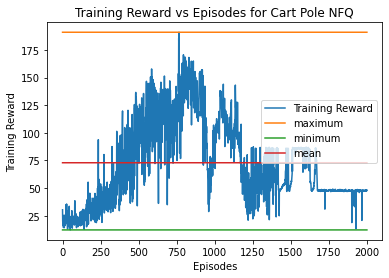

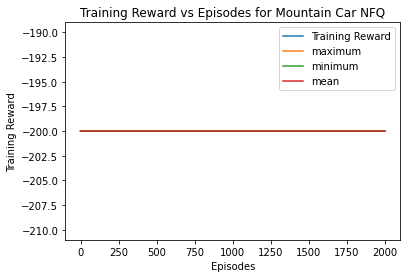

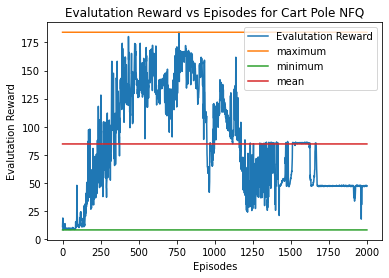

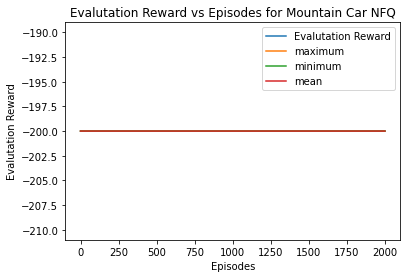

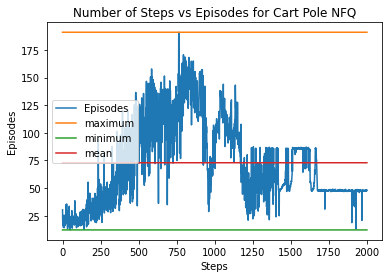

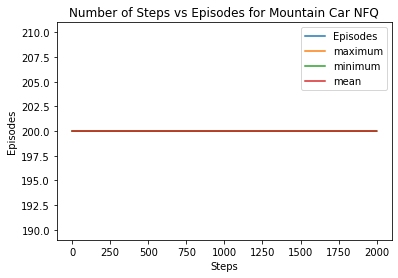

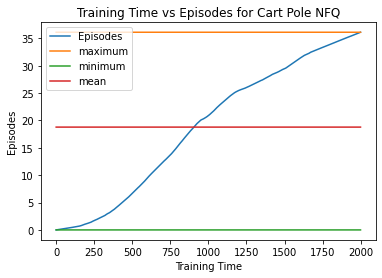

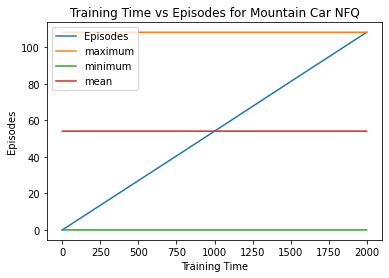

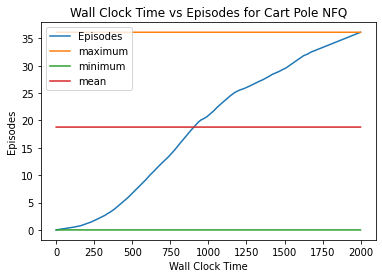

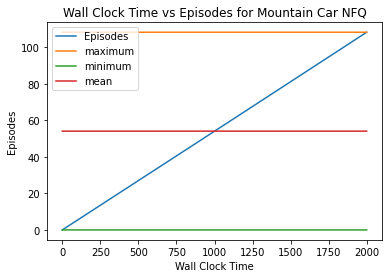

In [77]:
runNFQ()

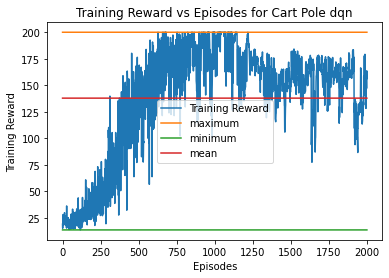

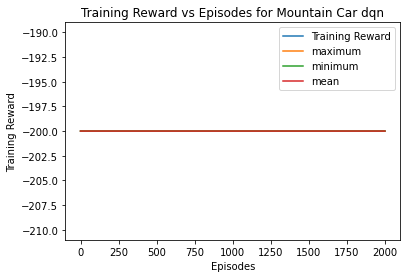

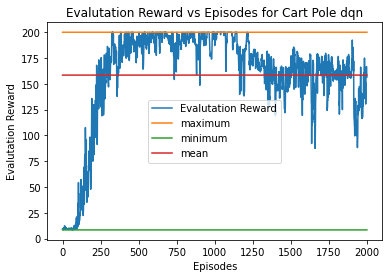

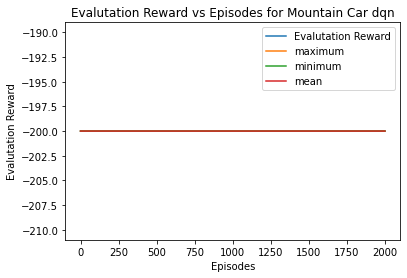

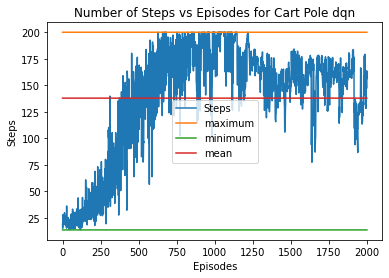

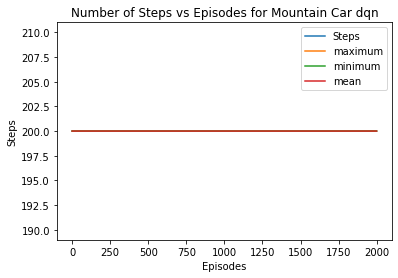

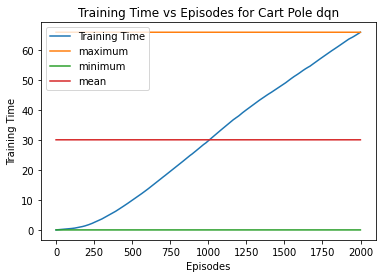

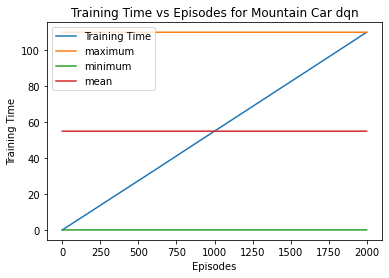

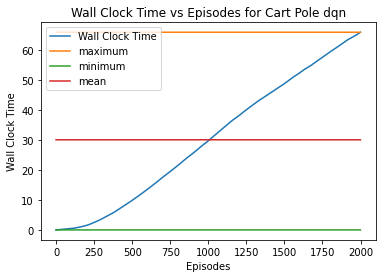

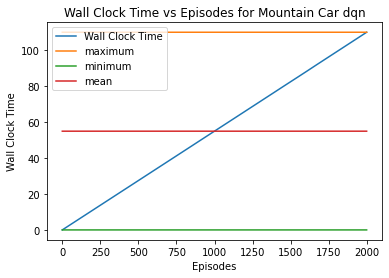

In [76]:
runDQN()

IN RUN-DDQN, the graphs in the code is from an older version of plot_graph, which was giving swapped axis labels for everything after number of steps vs episodes graph (included), and the labels of the blue lines. The correct ones are saved in the images folder under 21-30.

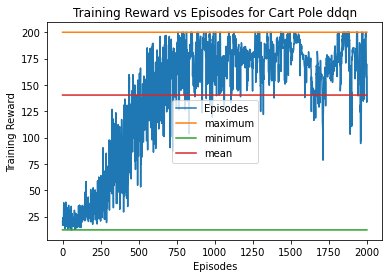

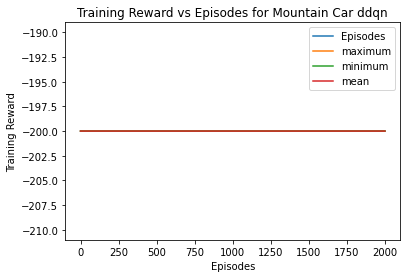

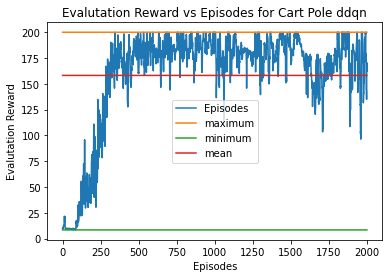

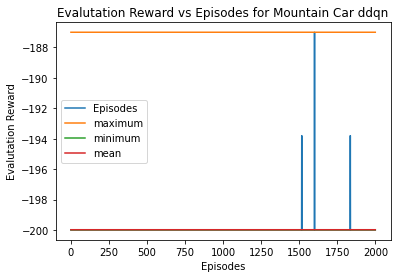

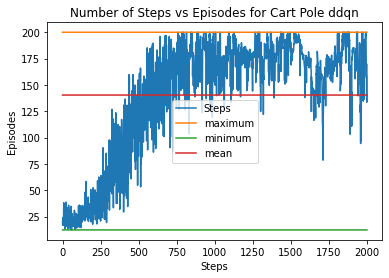

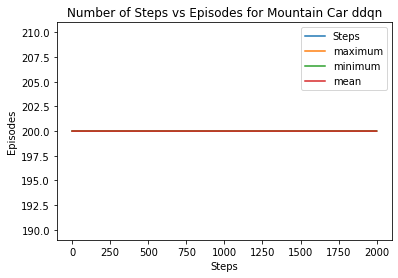

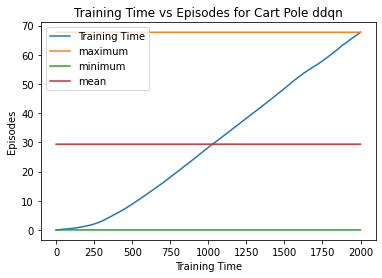

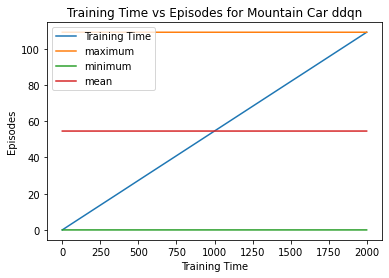

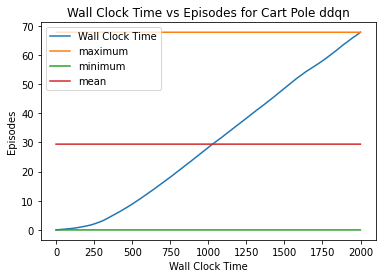

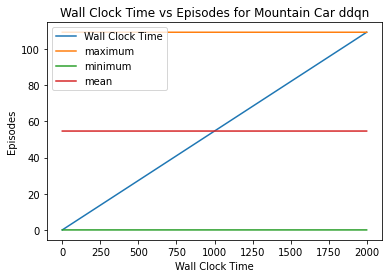

In [72]:
runddqn()

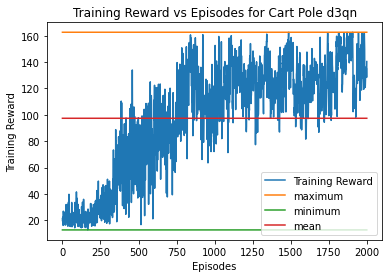

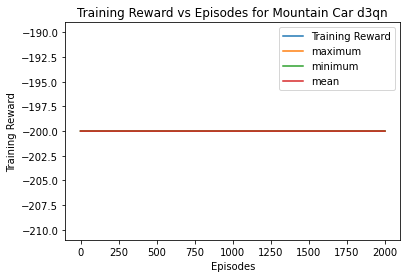

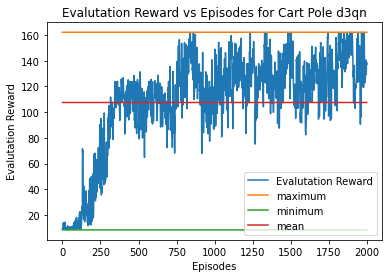

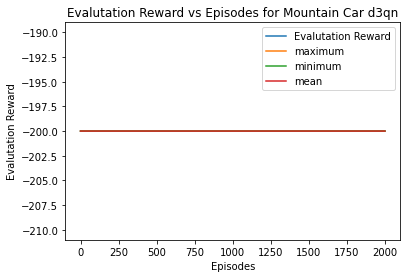

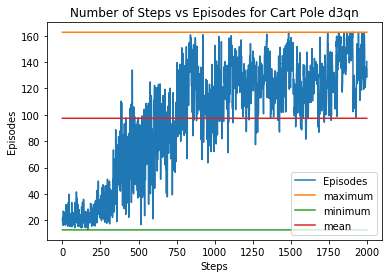

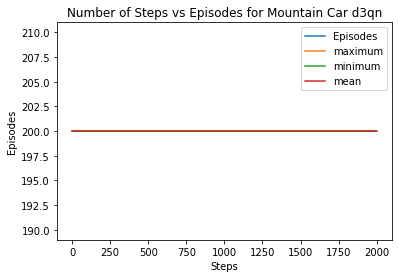

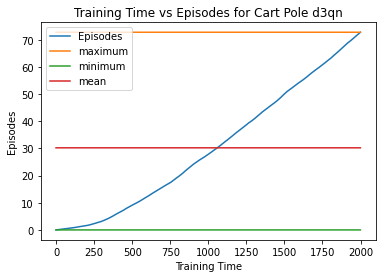

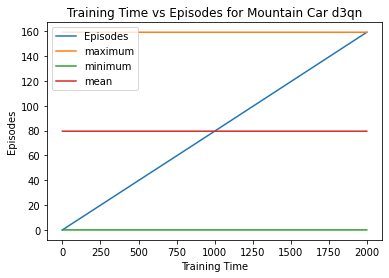

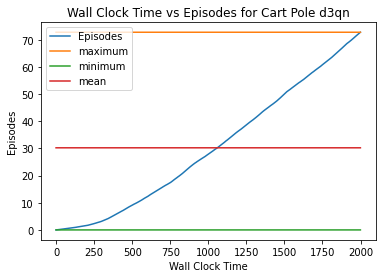

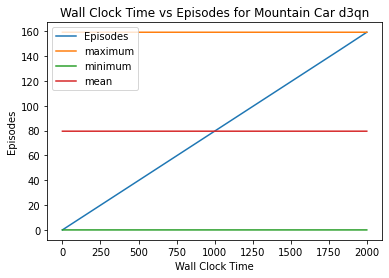

In [78]:
rund3qn()

11. Cart pole learns in about 500 episodes. D3QN > DDQN > DQN > NFQ in terms of learning while the time taken is the opposite. NFQ is not that effective as an algorithm since because of a target network, the algorithm is more prone to divergence.
12. Mountain Car learns in about 500 episodes. D3QN > DDQN > DQN > NFQ in terms of learning while the time taken is the opposite. NFQ is not that effective as an algorithm since because of a target network, the algorithm is more prone to divergence.